# Cargar Data

In [ ]:
import pandas as pd

df = pd.read_excel('data.xlsx')
print(df.head())

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


  vehicleId                       timestamp   latitude  longitude      speed  \
0    TFF4IW  2025-11-30T20:03:55.068107900Z -31.414646 -64.182731  48.378633   
1    R7VFTX  2025-11-30T20:03:55.068107900Z -31.413499 -64.185831  63.321700   
2    GJ0J9H  2025-11-30T20:03:55.068107900Z -31.419613 -64.181305  71.824406   
3    J7YPV4  2025-11-30T20:03:55.068107900Z -31.413764 -64.178804  59.207608   
4    H71DGN  2025-11-30T20:03:55.068107900Z -31.410860 -64.185821  63.646463   

   previousSpeed  acceleration  temperature    battery  fuelLevel weather  \
0      49.642739     -1.264106    68.991377  79.682236  99.513321   storm   
1      64.033620     -0.711920    75.725113  79.588172  99.374090   clear   
2      60.075991     11.748415    69.965318  79.691130  99.456152   clear   
3      38.774309     20.433299    68.337057  79.713076  99.316264    rain   
4      45.396472     18.249992    68.017510  79.569323  99.697226     fog   

  roadType  speedLimit  night  trafficLevel  anomaly ano

#Analisis por columna

##Speed

In [ ]:
min_speed = df['speed'].min()
max_speed = df['speed'].max()

print(f"Minimum Speed: {min_speed}")
print(f"Maximum Speed: {max_speed}")

Minimum Speed: 10.457240826471036
Maximum Speed: 199.598608517712


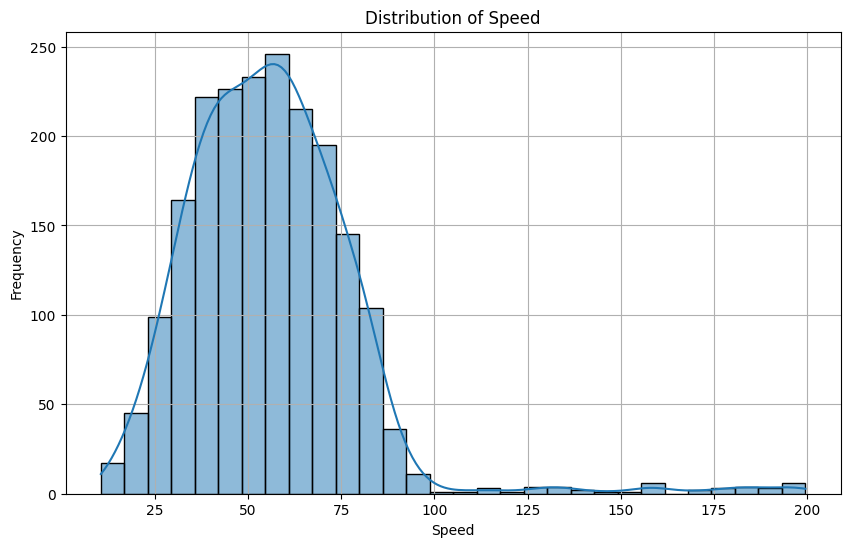

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['speed'], kde=True, bins=30)
plt.title('Distribution of Speed')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Speed vs PreviousSpeed

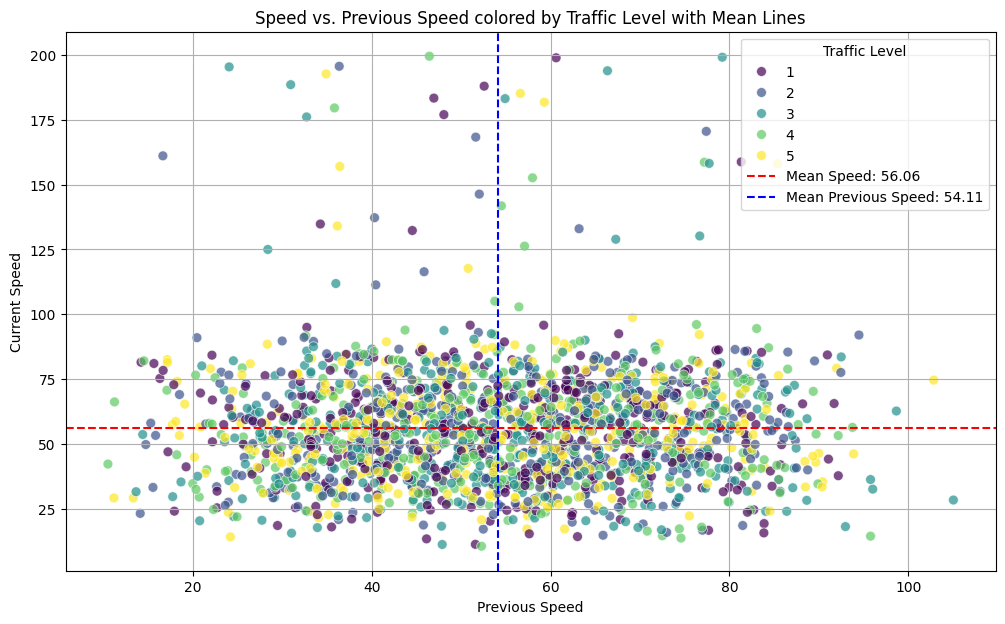

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))

# Create the scatter plot, coloring by 'trafficLevel'
sns.scatterplot(x='previousSpeed', y='speed', hue='trafficLevel', data=df, palette='viridis', s=50, alpha=0.7)

# Add mean lines for speed and previousSpeed
mean_speed = df['speed'].mean()
mean_previous_speed = df['previousSpeed'].mean()

plt.axhline(mean_speed, color='red', linestyle='--', label=f'Mean Speed: {mean_speed:.2f}')
plt.axvline(mean_previous_speed, color='blue', linestyle='--', label=f'Mean Previous Speed: {mean_previous_speed:.2f}')

plt.title('Speed vs. Previous Speed colored by Traffic Level with Mean Lines')
plt.xlabel('Previous Speed')
plt.ylabel('Current Speed')
plt.grid(True)
plt.legend(title='Traffic Level')
plt.show()

##Weather

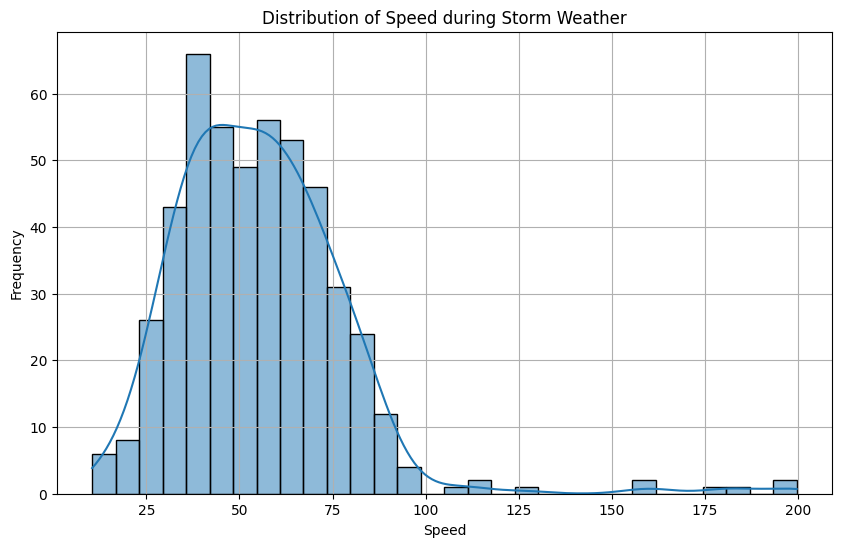

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for 'storm' weather
df_storm = df[df['weather'] == 'storm']

# Create a histogram of speed during storm conditions
plt.figure(figsize=(10, 6))
sns.histplot(df_storm['speed'], kde=True, bins=30)
plt.title('Distribution of Speed during Storm Weather')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
storm_min_speed = df_storm['speed'].min()
storm_max_speed = df_storm['speed'].max()
storm_mean_speed = df_storm['speed'].mean()

print(f"Minimum Speed during Storm: {storm_min_speed:.2f}")
print(f"Maximum Speed during Storm: {storm_max_speed:.2f}")
print(f"Mean Speed during Storm: {storm_mean_speed:.2f}")

Minimum Speed during Storm: 10.46
Maximum Speed during Storm: 199.60
Mean Speed during Storm: 55.38


# Autoencoders

## Preparar Datos para Autoencoder

Seleccionar las características numéricas del DataFrame `df` que se utilizarán como entrada para el modelo Autoencoder. Manejar los valores faltantes y escalar las características para asegurar que todas contribuyan por igual.


**Reasoning**:
To prepare the data for the Autoencoder, I will first identify all relevant numerical columns from the DataFrame `df`, excluding identifier and boolean-like columns. Then, I will handle any missing values in these selected features by imputing them with the mean of their respective columns.



In [ ]:
numerical_cols_ae = df.select_dtypes(include=['number']).columns
excluded_cols_ae = ['anomaly', 'night'] # Exclude if they are 0/1, as they are not continuous features

# Filter columns that are truly numerical and relevant
relevant_numerical_cols_ae = [col for col in numerical_cols_ae if col not in excluded_cols_ae]

features_for_autoencoder = df[relevant_numerical_cols_ae].copy()

# Handle missing values by imputing with the mean
features_for_autoencoder = features_for_autoencoder.fillna(features_for_autoencoder.mean())

print("Shape of features_for_autoencoder after selecting columns and handling NaNs:", features_for_autoencoder.shape)
print("First 5 rows of features_for_autoencoder:")
print(features_for_autoencoder.head())

Shape of features_for_autoencoder after selecting columns and handling NaNs: (2000, 10)
First 5 rows of features_for_autoencoder:
    latitude  longitude      speed  previousSpeed  acceleration  temperature  \
0 -31.414646 -64.182731  48.378633      49.642739     -1.264106    68.991377   
1 -31.413499 -64.185831  63.321700      64.033620     -0.711920    75.725113   
2 -31.419613 -64.181305  71.824406      60.075991     11.748415    69.965318   
3 -31.413764 -64.178804  59.207608      38.774309     20.433299    68.337057   
4 -31.410860 -64.185821  63.646463      45.396472     18.249992    68.017510   

     battery  fuelLevel  speedLimit  trafficLevel  
0  79.682236  99.513321          90             3  
1  79.588172  99.374090          90             3  
2  79.691130  99.456152         120             3  
3  79.713076  99.316264          90             5  
4  79.569323  99.697226         120             3  


**Reasoning**:
The data has been selected and missing values handled. The next step is to scale these features using `StandardScaler` to ensure they contribute equally to the Autoencoder model.



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_ae = StandardScaler()
scaled_features_autoencoder = pd.DataFrame(scaler_ae.fit_transform(features_for_autoencoder), columns=features_for_autoencoder.columns, index=features_for_autoencoder.index)

print("Shape of scaled_features_autoencoder:", scaled_features_autoencoder.shape)
print("First 5 rows of scaled_features_autoencoder:")
print(scaled_features_autoencoder.head())

Shape of scaled_features_autoencoder: (2000, 10)
First 5 rows of scaled_features_autoencoder:
   latitude  longitude     speed  previousSpeed  acceleration  temperature  \
0  0.134002   0.323669 -0.331890      -0.255750     -0.048365    -0.205699   
1  0.522381  -0.750033  0.313572       0.567421     -0.025786     0.625498   
2 -1.547665   0.817559  0.680845       0.341041      0.483703    -0.085478   
3  0.432720   1.683853  0.135865      -0.877435      0.838818    -0.286467   
4  1.416006  -0.746393  0.327601      -0.498641      0.749545    -0.325911   

    battery  fuelLevel  speedLimit  trafficLevel  
0  0.128247  -0.360513   -0.012209     -0.001061  
1  0.117699  -0.965600   -0.012209     -0.001061  
2  0.129245  -0.608963    1.208666     -0.001061  
3  0.131706  -1.216908   -0.012209      1.413684  
4  0.115585   0.438725    1.208666     -0.001061  


## Construir y Entrenar el Modelo Autoencoder

### Subtask:
Definir la arquitectura del Autoencoder (capas del codificador y decodificador), compilar el modelo y entrenarlo utilizando las características numéricas escaladas.


**Reasoning**:
To define the Autoencoder model, I need to import the necessary Keras modules, determine the input dimension from the scaled features, construct the encoder and decoder layers, compile the model with an optimizer and loss function, and then train it with the prepared data.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define input dimension
input_dim = scaled_features_autoencoder.shape[1]

# Build the Autoencoder model
model_ae = Sequential([
    Dense(units=input_dim, activation='relu', input_shape=(input_dim,)), # Input layer
    Dense(units=input_dim // 2, activation='relu'), # Encoder layer
    Dense(units=input_dim // 2, activation='relu'), # Decoder layer
    Dense(units=input_dim, activation='linear') # Output layer
])

# Compile the model
model_ae.compile(optimizer='adam', loss='mse')

# Train the model
history = model_ae.fit(scaled_features_autoencoder, scaled_features_autoencoder,
                       epochs=50,
                       batch_size=32,
                       validation_split=0.2,
                       verbose=0)

print("Autoencoder model built, compiled, and trained.")
print(model_ae.summary())
print("Training history keys:", history.history.keys())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Autoencoder model built, compiled, and trained.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 767 (3.00 KB)

 Trainable params: 255 (1020.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 512 (2.00 KB)

None
Training history keys: dict_keys(['loss', 'val_loss'])


**Reasoning**:
The previous code produced a UserWarning regarding the `input_shape` argument in a `Sequential` model. To adhere to the recommended practice in Keras, I will explicitly define an `Input` layer as the first layer of the `Sequential` model.



In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input

# Define input dimension
input_dim = scaled_features_autoencoder.shape[1]

# Build the Autoencoder model using functional API for clarity on input layer
input_layer = Input(shape=(input_dim,))
encoder_layer = Dense(units=input_dim // 2, activation='relu')(input_layer)
decoder_layer = Dense(units=input_dim // 2, activation='relu')(encoder_layer)
output_layer = Dense(units=input_dim, activation='linear')(decoder_layer)

model_ae = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model_ae.compile(optimizer='adam', loss='mse')

# Train the model
history = model_ae.fit(scaled_features_autoencoder, scaled_features_autoencoder,
                       epochs=50,
                       batch_size=32,
                       validation_split=0.2,
                       verbose=0)

print("Autoencoder model built, compiled, and trained.")
print(model_ae.summary())
print("Training history keys:", history.history.keys())

Autoencoder model built, compiled, and trained.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 437 (1.71 KB)

 Trainable params: 145 (580.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 292 (1.14 KB)

None
Training history keys: dict_keys(['loss', 'val_loss'])


## Calcular el Error de Reconstrucción

### Subtask:
Utilizar el Autoencoder entrenado para reconstruir los datos de entrada y calcular el error de reconstrucción (por ejemplo, el error cuadrático medio) para cada registro.


**Reasoning**:
To calculate the reconstruction error, I will use the trained Autoencoder model to predict the reconstructed data and then compute the Mean Squared Error between the original and reconstructed data for each record. Finally, I will add this error as a new column to the main DataFrame, display its descriptive statistics, and show the first few rows of the updated DataFrame.



In [ ]:
import numpy as np

# Predict reconstructions
reconstructions = model_ae.predict(scaled_features_autoencoder)

# Calculate reconstruction error (MSE for each data point)
reconstruction_error = np.mean(np.power(scaled_features_autoencoder - reconstructions, 2), axis=1)

# Add the reconstruction error to the original DataFrame
df['reconstruction_error'] = reconstruction_error

print("Descriptive statistics for 'reconstruction_error' column:")
print(df['reconstruction_error'].describe())

print("\nFirst 5 rows of df with 'reconstruction_error' column:")
print(df[['vehicleId', 'timestamp', 'reconstruction_error']].head())

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Descriptive statistics for 'reconstruction_error' column:
count    2000.000000
mean        0.461206
std         0.333327
min         0.019130
25%         0.284661
50%         0.404854
75%         0.552715
max         3.484203
Name: reconstruction_error, dtype: float64

First 5 rows of df with 'reconstruction_error' column:
  vehicleId                       timestamp  reconstruction_error
0    TFF4IW  2025-11-30T20:03:55.068107900Z              0.032691
1    R7VFTX  2025-11-30T20:03:55.068107900Z              0.193792
2    GJ0J9H  2025-11-30T20:03:55.068107900Z              0.263189
3    J7YPV4  2025-11-30T20:03:55.068107900Z              0.598806
4    H71DGN  2025-11-30T20:03:55.068107900Z              0.323135


## Identificar Anomalías con Autoencoder

### Subtask:
Establecer un umbral en el error de reconstrucción para clasificar los registros como normales o anómalos. Los registros con un error de reconstrucción por encima del umbral serán considerados anomalías. Luego, mostrar las anomalías detectadas.


## Pruebas

In [ ]:
import re
import pandas as pd

log_data = "2025-11-30T17:17:45.550-03:00  INFO 18956 --- [vehicle-telemetry-service] [   scheduling-1] c.m.v.kafka.producer.KafkaProducer       : ✅ Enviado a Kafka: VehicleData(vehicleId=8K0TIH, timestamp=2025-11-30T20:17:45.550347800Z, latitude=-31.413947457841243, longitude=-64.1875766703414, speed=30.76833372095486, previousSpeed=39.896813877021906, acceleration=-9.128480156067045, temperature=77.64902713313586, battery=79.83259027687475, fuelLevel=99.51234711683932, weather=rain, roadType=urban, speedLimit=60.0, night=true, trafficLevel=3, anomaly=false, anomalyType=null)"

# Extract relevant data from the log string using regex
match = re.search(r'VehicleData\((.*?)\)', log_data)
if match:
    data_str = match.group(1)

    # Parse key-value pairs
    data_dict = {}
    for item in data_str.split(', '):
        if '=' in item:
            key, value = item.split('=', 1)
            # Attempt to convert to appropriate type
            try:
                data_dict[key] = float(value) if '.' in value else int(value)
            except ValueError:
                if value.lower() == 'true':
                    data_dict[key] = True
                elif value.lower() == 'false':
                    data_dict[key] = False
                elif value.lower() == 'null':
                    data_dict[key] = None
                else:
                    data_dict[key] = value.strip("'")

    # Convert to DataFrame
    new_data_point = pd.DataFrame([data_dict])

    # Ensure 'timestamp' is a datetime object
    if 'timestamp' in new_data_point.columns:
        new_data_point['timestamp'] = pd.to_datetime(new_data_point['timestamp'])

    print("Parsed new data point:")
    print(new_data_point)

    # Align columns with the features used for Autoencoder training
    # Add missing columns with mean values from the training data
    # Make sure to handle potential new columns from log or missing from features_for_autoencoder
    processed_new_data = pd.DataFrame(columns=features_for_autoencoder.columns)
    for col in features_for_autoencoder.columns:
        if col in new_data_point.columns:
            processed_new_data[col] = new_data_point[col]
        else:
            # Use the mean from the training data if the column is missing in the new data point
            processed_new_data[col] = features_for_autoencoder[col].mean()

    # Ensure the order of columns is the same as in training data
    processed_new_data = processed_new_data[features_for_autoencoder.columns]

    # Handle potential NaN values in the new data point that might arise if a column was not in log
    # and not in original features_for_autoencoder for some reason. Fill with mean from original data.
    processed_new_data = processed_new_data.fillna(features_for_autoencoder.mean())

    # Scale the new data point using the previously fitted scaler
    scaled_new_data = scaler_ae.transform(processed_new_data)
    scaled_new_data_df = pd.DataFrame(scaled_new_data, columns=features_for_autoencoder.columns)

    # Predict reconstruction
    reconstructed_new_data = model_ae.predict(scaled_new_data)

    # Calculate reconstruction error
    reconstruction_error_new = np.mean(np.power(scaled_new_data - reconstructed_new_data, 2), axis=1)

    print(f"\nReconstruction Error for the new data point: {reconstruction_error_new[0]:.4f}")

    # You can compare this error to the descriptive statistics of 'reconstruction_error'
    # from the training data (df['reconstruction_error'].describe()) to determine if it's an anomaly.
    # For example, if it's above the 95th percentile of the original reconstruction errors.

    threshold_for_anomaly = df['reconstruction_error'].quantile(0.95)
    print(f"95th percentile of reconstruction errors from training data: {threshold_for_anomaly:.4f}")

    if reconstruction_error_new[0] > threshold_for_anomaly:
        print("The new data point is likely an anomaly based on the Autoencoder model.")
    else:
        print("The new data point appears to be normal based on the Autoencoder model.")

else:
    print("Could not parse the log data.")

Parsed new data point:
  vehicleId                           timestamp   latitude  longitude  \
0    8K0TIH 2025-11-30 20:17:45.550347800+00:00 -31.413947 -64.187577   

       speed  previousSpeed  acceleration  temperature   battery  fuelLevel  \
0  30.768334      39.896814      -9.12848    77.649027  79.83259  99.512347   

  weather roadType  speedLimit  night  trafficLevel  anomaly anomalyType  
0    rain    urban        60.0   True             3    False        None  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Reconstruction Error for the new data point: 0.0720
95th percentile of reconstruction errors from training data: 0.8574
The new data point appears to be normal based on the Autoencoder model.


No es una ANOMALIA porque 0.2069 es menor a 0.4667

In [ ]:
import pickle

model_pkl_filename = 'model.pkl'

try:
    with open(model_pkl_filename, 'wb') as file:
        # Save a dictionary containing the Keras model, scaler, and threshold
        pickle.dump({
            'autoencoder_model': model_ae,
            'scaler': scaler_ae,
            'threshold': threshold_for_anomaly
        }, file)
    print(f"Autoencoder model and related components saved successfully as '{model_pkl_filename}'.")
except Exception as e:
    print(f"Error saving components with pickle: {e}")
    print("It's highly recommended to use the .keras format for Keras models and save scaler/threshold separately if needed.")

Autoencoder model and related components saved successfully as 'model.pkl'.
